<a href="https://colab.research.google.com/github/Dyaruro1/Churn-Prediction-ML/blob/main/notebooks/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A continuación se detallan las variables que contiene el dataset,

- customerID.- Recoge el ID de cada cliente

**Variables personales:**

- gender.- Indica si el cliente es hombre o mujer
- SeniorCitizen.- Indica si el cliente es una persona mayor o no
- Partner.- Indica si el cliente tiene pareja o no
- Dependents.- Indica si el cliente tiene dependientes o no

**Variable que indica antigüedad:**

- tenure.- Indica el nº de meses que el cliente ha permanecido en la cía, o que permanece

- Variables asociadas al servicio suscrito:

- PhoneService.- Indica si el cliente tiene servicio telefónico o no
- MultipleLines.- Indica si el cliente tiene múltiples líneas o no
- InternetService.- Indica el proveedor de servicios de internet del cliente
- OnlineSecurity.- Indica si el cliente tiene seguridad en línea o no
- OnlineBackup.- Indica si el cliente tiene respaldo en línea o no
- DeviceProtection.- Indica si el cliente tiene protección del dispositivo o no
- TechSupport.- Indica si el cliente tiene soporte técnico o no
- StreamingTV.- Indica si el cliente tiene servicio de TV en streaming o no
- StreamingMovies.- Indica si el cliente dispone del servicio de películas en streaming o no

**Variables asociadas al tipo de contrato:**

- Contract.- Indica el plazo del contrato
- PaperlessBilling.- Indica si el cliente dispone de facturación electrónica o no
- PaymentMethod.- Indica el método de pago del cliente

**Otras variables:**

- MonthlyCharges.- Indica el importe cobrado mensualmente al cliente
- TotalCharges.- Indica la cantidad total cargada al cliente
- Churn.- Indica si el cliente abandonó o no, será la variable a predecir

In [2]:


churn_df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
pd.set_option('display.max_columns', None)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_df.shape

(7043, 21)

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
churn_df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


`TotalCharges` aparece como columna numerica sin embargo debemos convertirla a numerica, parece ser que hay datos con la cadena vacia en esa columna

Vamos en primer lugar a revisar esa columna `TotalCharges`

In [8]:
total_charges = churn_df['TotalCharges']
total_charges.head()

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


In [9]:
total_charges.value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [10]:
total_charges = total_charges.replace(' ', np.nan)
total_charges.value_counts()

,count
TotalCharges,
20.2,11
19.75,9
19.65,8
19.9,8
20.05,8
...,...
130.15,1
3211.9,1
7843.55,1


In [11]:
total_charges = total_charges.astype('float')
total_charges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [12]:
churn_df["TotalCharges"] = total_charges
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
churn_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Realizando algunas graficas exploratorias

### Variables categoricas

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


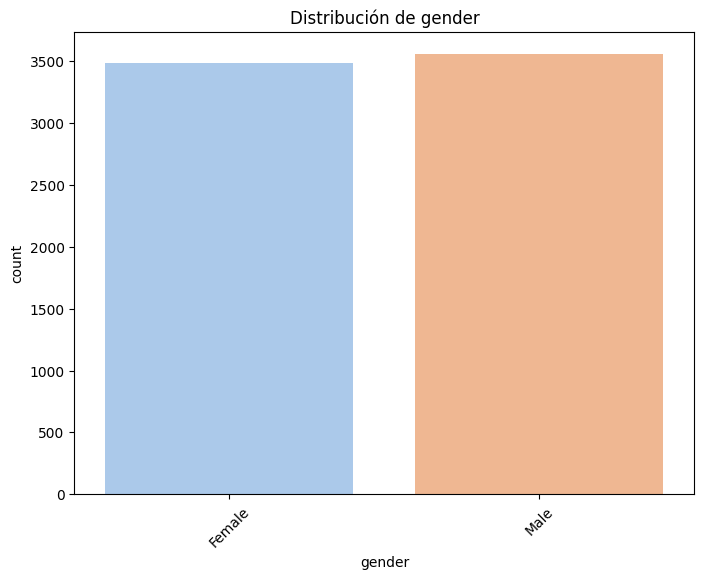

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


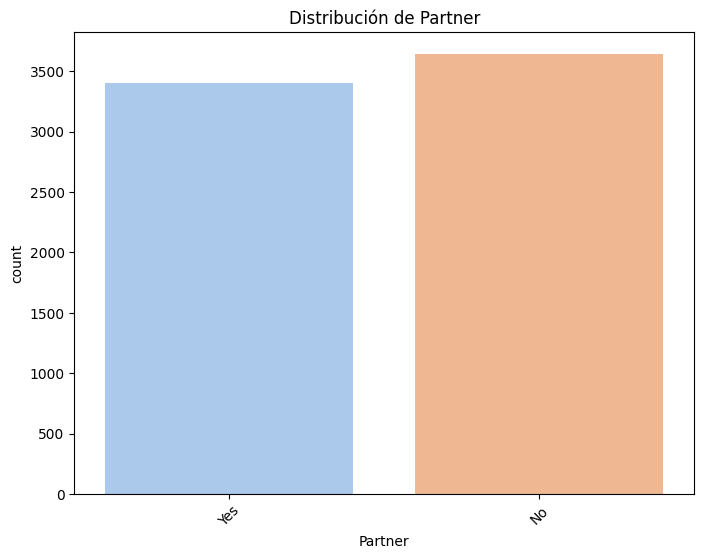

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


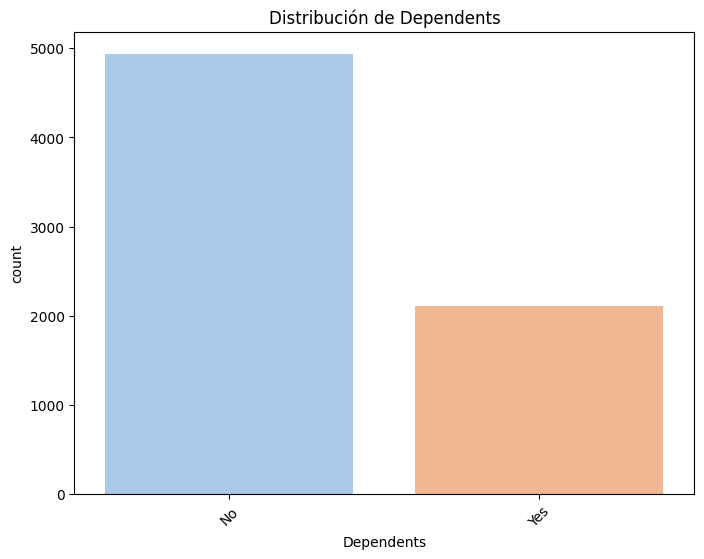

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


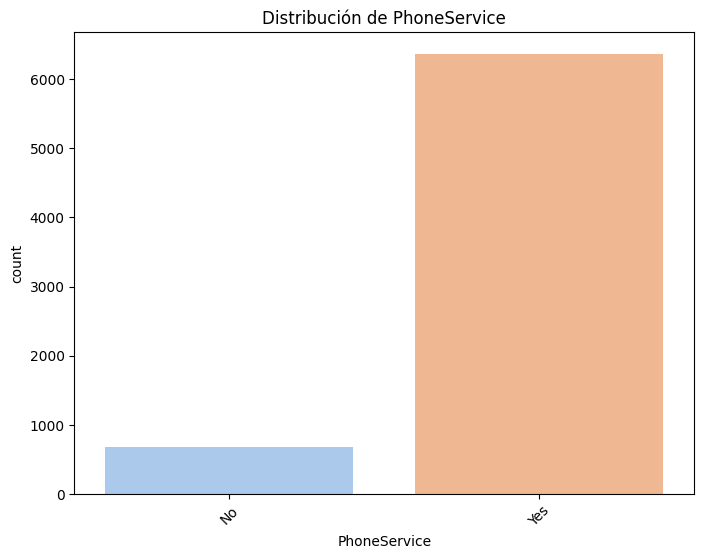

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


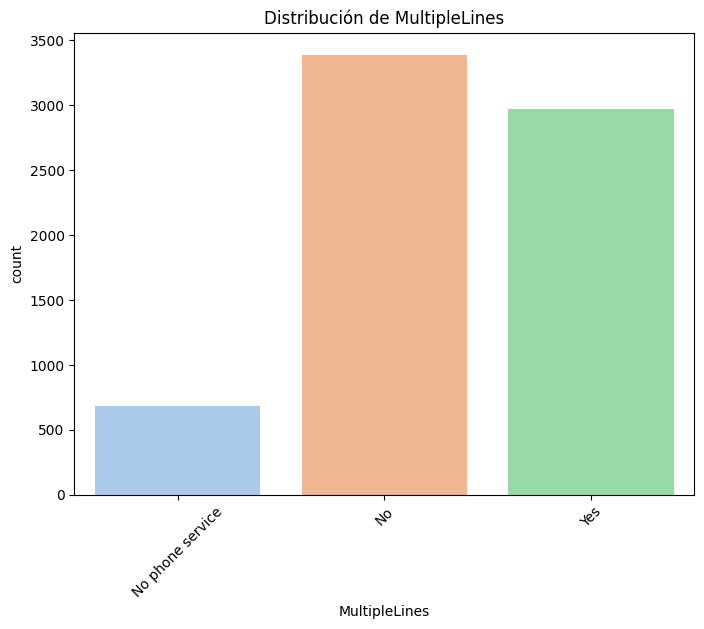

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


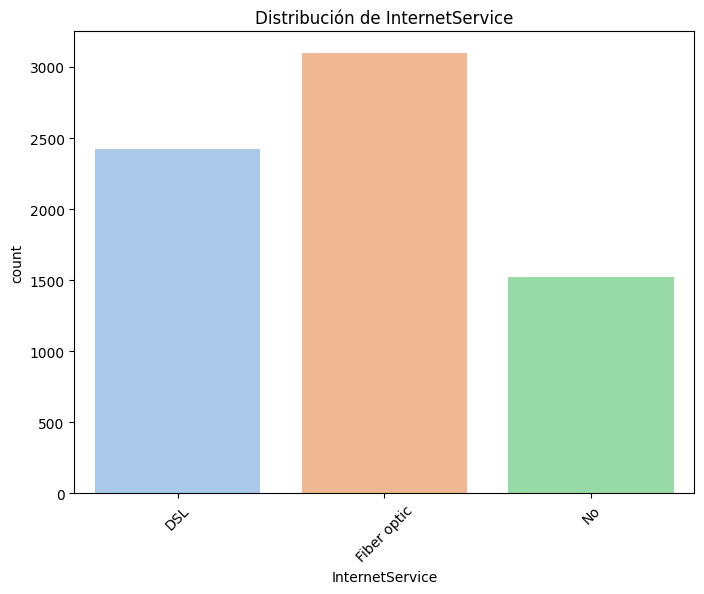

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


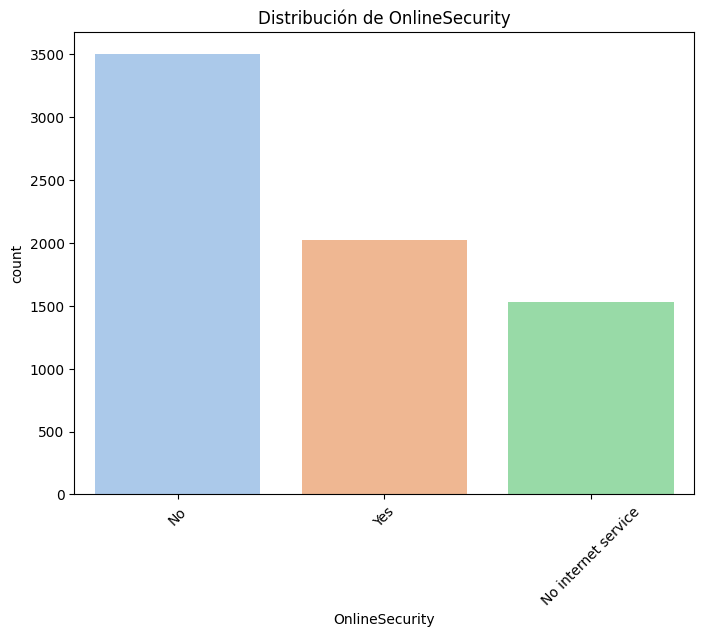

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


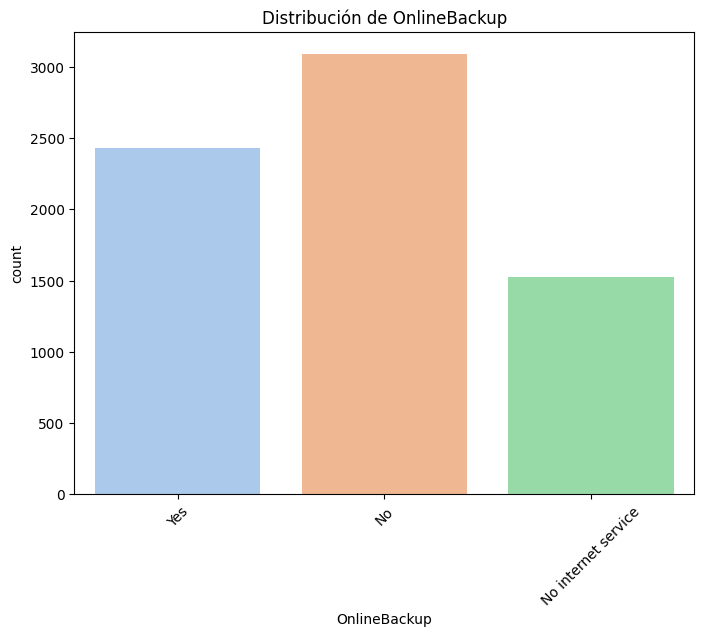

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


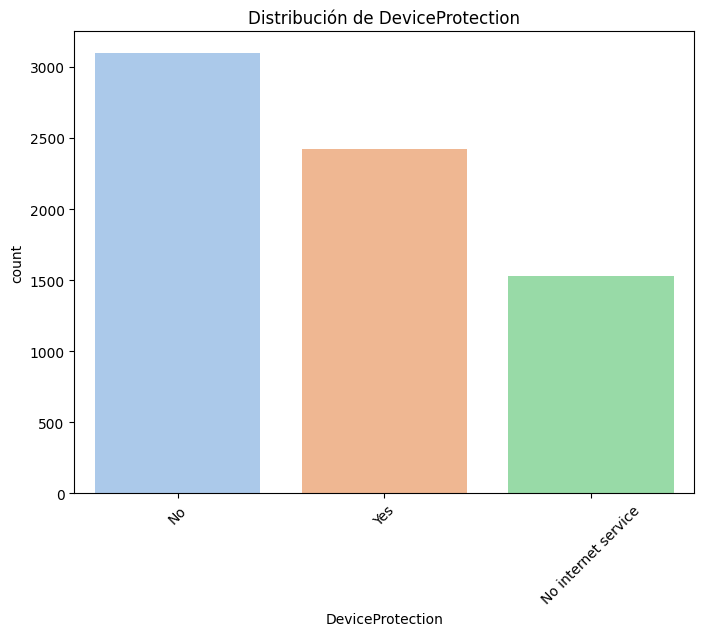

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


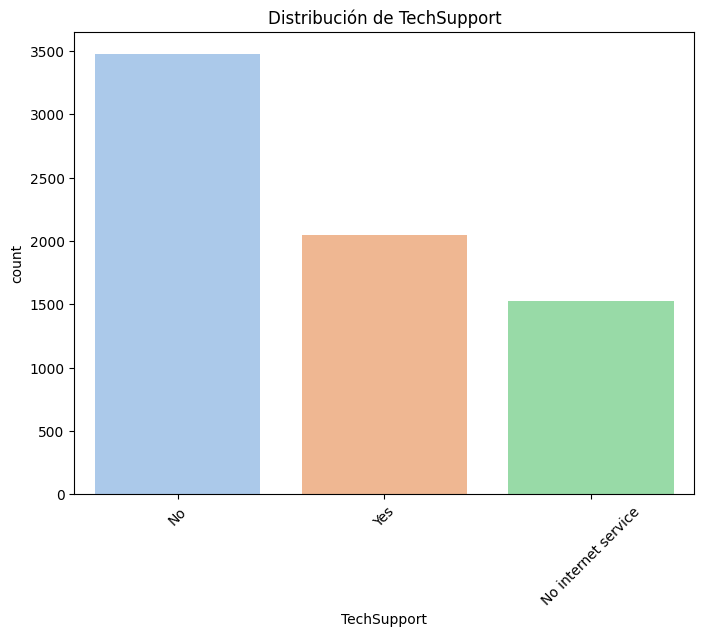

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


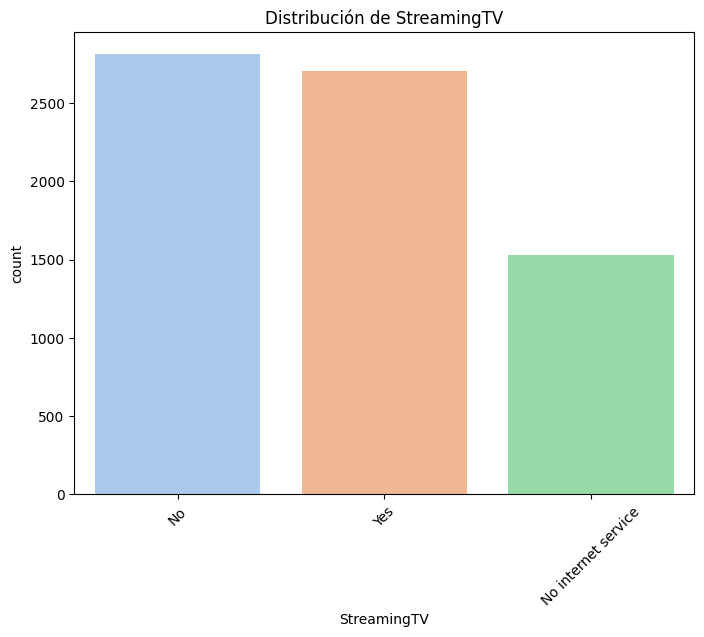

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


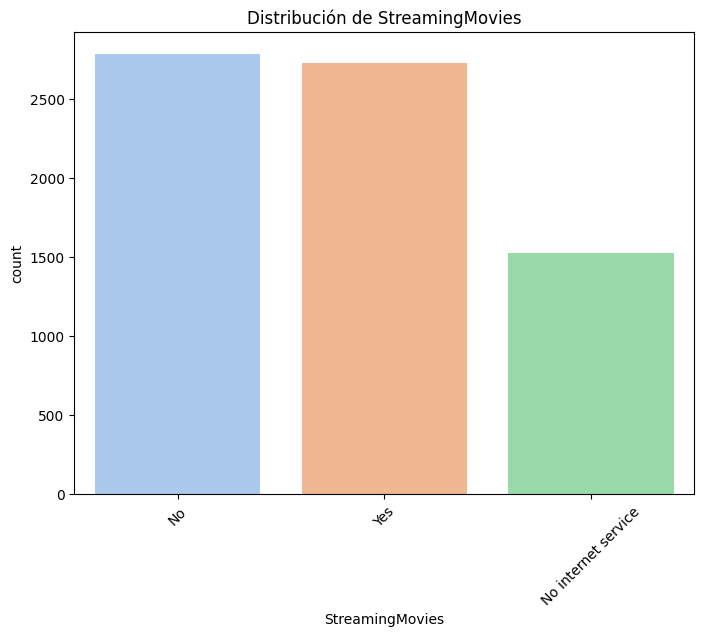

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


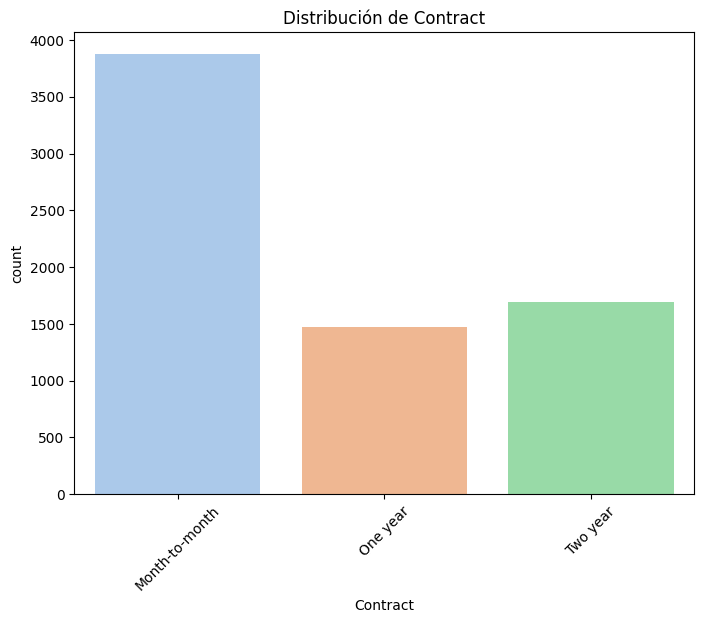

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


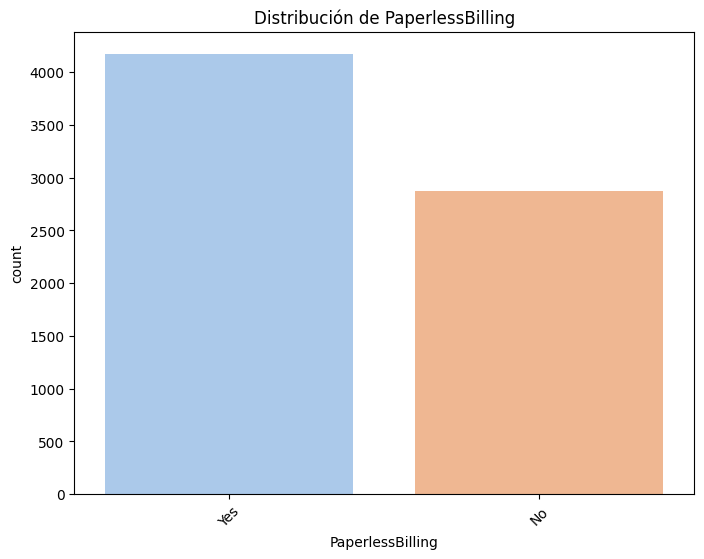

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


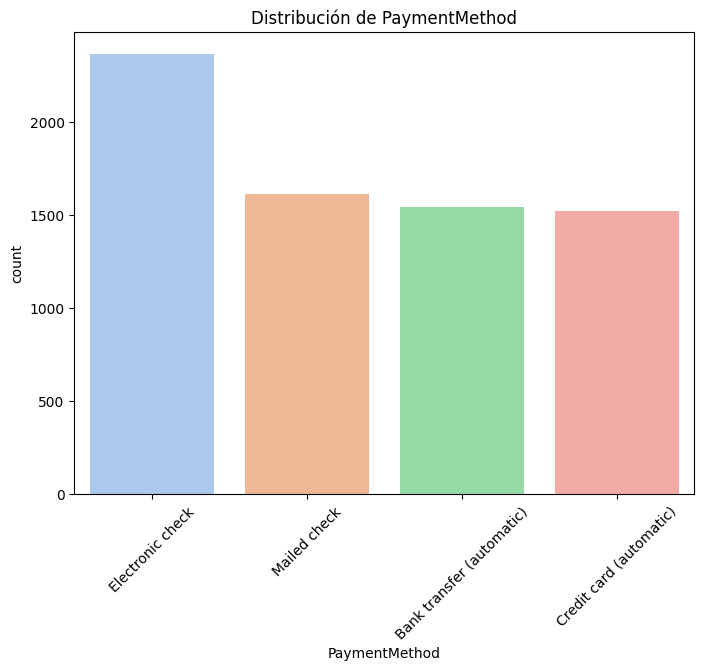

<ipython-input-22-5b9298da3074>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x=column, palette="pastel")


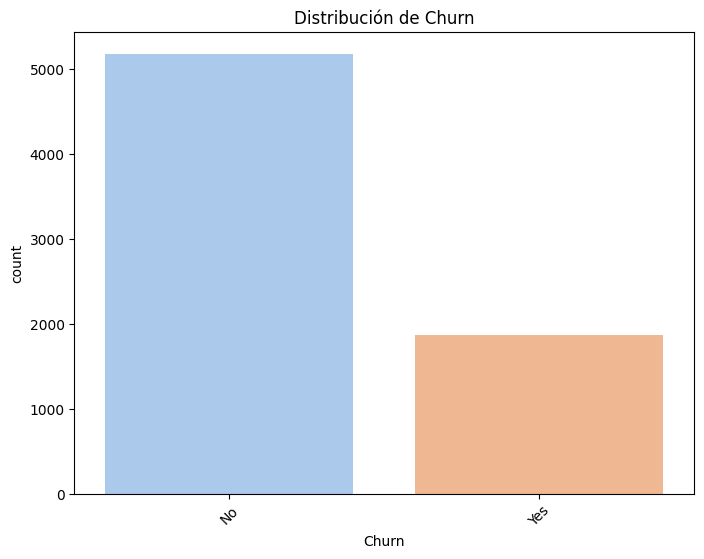

In [22]:
categorical_columns = churn_df.select_dtypes(include='object').columns[1:]

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=churn_df, x=column, palette="pastel")
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()

In [26]:
churn_df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


- Podemos observar que nuestra columna a predecir `Churn` han habido mas clientes que no han abandonado comparado con los que si lo han hecho, esto es algo importante a destacar para nuestras predicciones





Revisemos la variable tambien
- Senior Citizen

<ipython-input-28-27ff704c6ebf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SeniorCitizen', data=churn_df, palette='pastel')


<Axes: xlabel='SeniorCitizen', ylabel='count'>

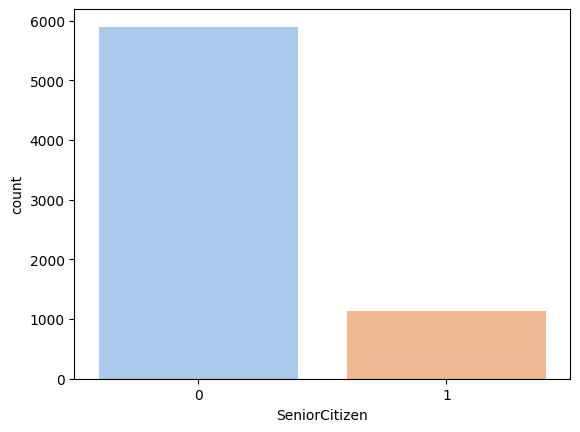

In [28]:
sns.countplot(x='SeniorCitizen', data=churn_df, palette='pastel')

### Variables Numericas

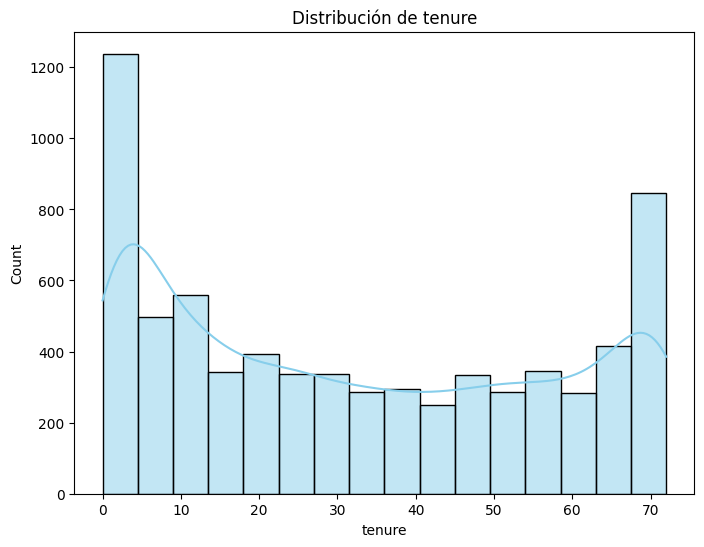

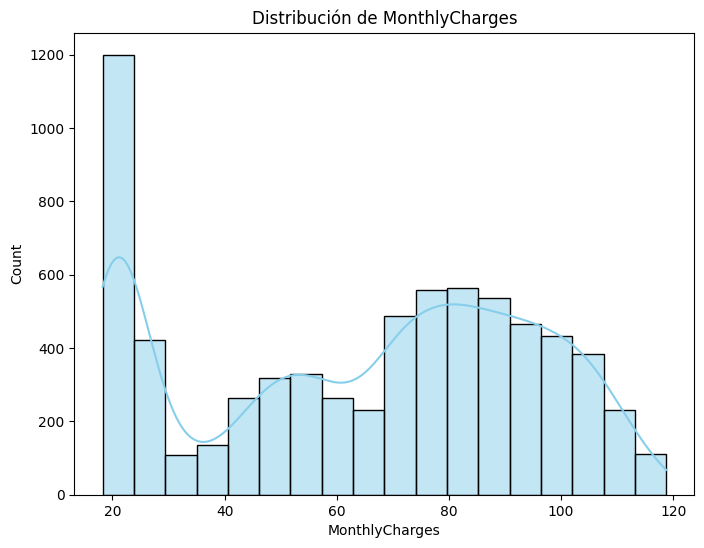

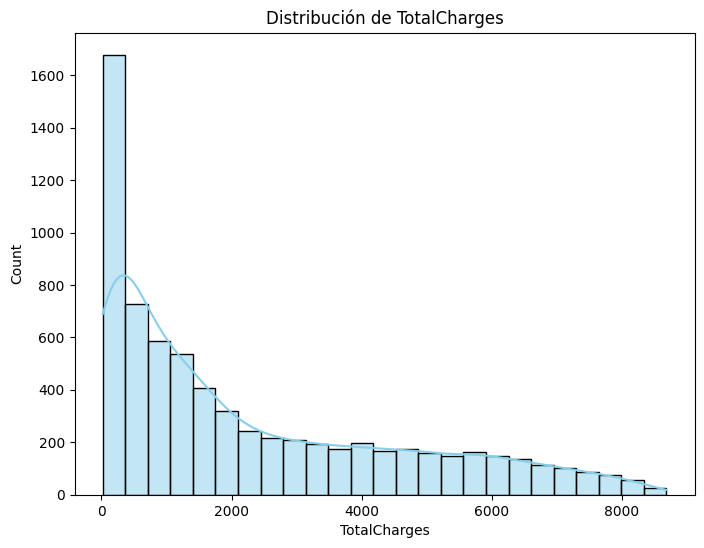

In [29]:
numeric_columns = churn_df.select_dtypes(include='number').columns[1:]


for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=churn_df, x=column, kde=True, color='skyblue')
    plt.title(f'Distribución de {column}')

Revisemos un poco correlaciones en general

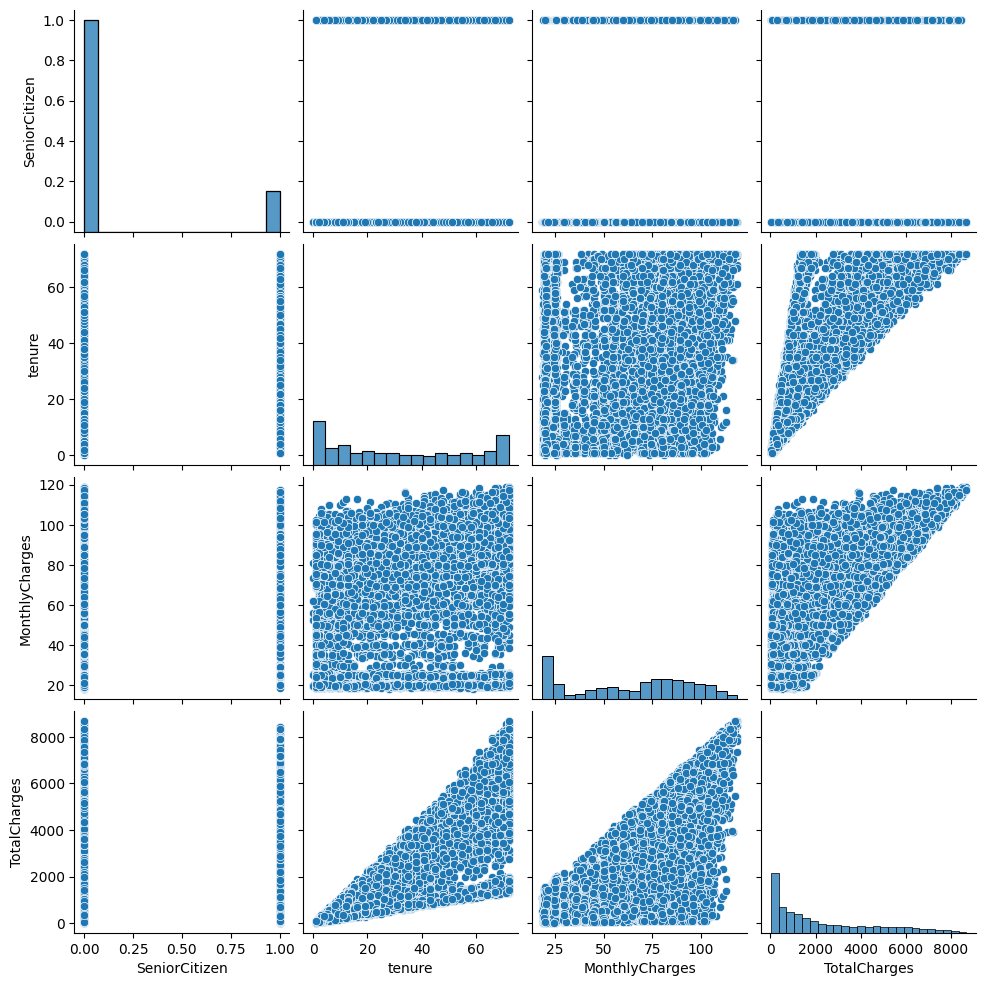

In [30]:
sns.pairplot(churn_df)